##**This is an example**##



##Check EC TAC Notebook Template at https://github.com/earthcube/NotebookTemplates!##



In [6]:
import requests
import numpy as np
import pandas as pd

from datetime import datetime, timedelta
import calendar

import matplotlib.pylab as plt
import matplotlib
matplotlib.font_manager._rebuild()

import matplotlib.patches as mpatches
    
#import warnings
#warnings.filterwarnings('ignore')

###**Get a profile from Argovis**###

In [2]:
def get_profile(profile_number):
    url = 'https://argovis.colorado.edu/catalog/profiles/{}'.format(profile_number)
    resp = requests.get(url)
    # Consider any status other than 2xx an error
    if not resp.status_code // 100 == 2:
        return "Error: Unexpected response {}".format(resp)
    profile = resp.json()
    return profile

In [3]:
profileDict = get_profile('3900737_279')

profileDict is a set of key:value pairs enclosed by curly brackets. These are profile objects stored in the Argovis Database, imported in a Python environment. We expose the keys with the command profileDict.keys()

In [4]:
print(profileDict.keys())
profileDict = get_profile('3900737_279')
profileDf = pd.DataFrame(profileDict['measurements'])
profileDf['cycle_number'] = profileDict['cycle_number']
profileDf['profile_id'] = profileDict['_id']
profileDf.head()

dict_keys(['bgcMeasKeys', 'station_parameters', 'station_parameters_in_nc', 'PARAMETER_DATA_MODE', '_id', 'POSITIONING_SYSTEM', 'DATA_CENTRE', 'PI_NAME', 'WMO_INST_TYPE', 'VERTICAL_SAMPLING_SCHEME', 'DATA_MODE', 'PLATFORM_TYPE', 'measurements', 'pres_max_for_TEMP', 'pres_min_for_TEMP', 'pres_max_for_PSAL', 'pres_min_for_PSAL', 'max_pres', 'date', 'date_added', 'date_qc', 'lat', 'lon', 'geoLocation', 'position_qc', 'cycle_number', 'dac', 'platform_number', 'nc_url', 'DIRECTION', 'BASIN', 'bgcMeas', 'url', 'core_data_mode', 'jcommopsPlatform', 'euroargoPlatform', 'formatted_station_parameters', 'roundLat', 'roundLon', 'strLat', 'strLon', 'date_formatted', 'id'])


,temp,psal,pres,cycle_number,profile_id
0,27.165,35.421,4.4,279,3900737_279
1,27.063,35.421,10.0,279,3900737_279
2,27.055,35.422,16.9,279,3900737_279
3,27.048,35.422,23.7,279,3900737_279
4,27.046,35.421,30.9,279,3900737_279


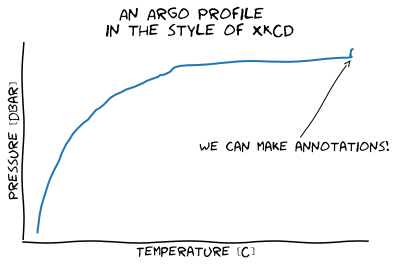

In [7]:
# matplotlib and selected style
with plt.xkcd():
    fig = plt.figure()
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.invert_yaxis()

    dataX = profileDf.pres.values
    dataY = profileDf.temp.values
    ax.plot(dataY, dataX)

    ax.set_title('An Argo Profile \n in the style of XKCD')
    ax.set_xlabel('Temperature [C]')
    ax.set_ylabel('Pressure [dbar]')
    
    ax.annotate(
    'We can make annotations!',
    xy=(dataY[12], dataX[12]+10), \
        arrowprops=dict( color='k', arrowstyle='->'), xytext=(15, 1100))